# Marketing Campaign Analysis

## 📌 1. Project Summary

Tujuan project ini adalah untuk menganalisis data customer dari sebuah campaign pemasaran
dan memahami karakteristik pelanggan yang berpotensi menerima penawaran campaign.

Analisis mencakup:
- Pembersihan dan validasi kualitas data,
- Pembuatan fitur turunan untuk memperkaya informasi customer,
- Exploratory Data Analysis (EDA) untuk menemukan pola perilaku,
- Pembangunan model machine learning untuk memprediksi `Response`,
- Penjelasan model menggunakan SHAP,
- dan penyusunan insight bisnis sebagai rekomendasi strategis.

Notebook ini dibuat sebagai bagian dari portfolio Data Analyst dan
dirancang agar dapat dibaca dengan cepat, runtut, dan memberikan pemahaman menyeluruh
dalam waktu kurang dari 5 menit.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [6]:
dataku = pd.read_csv('marketing_data.csv')

In [7]:
dataku.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## 2. Data Quality Check

Sebelum melakukan analisis lebih jauh, langkah pertama adalah memastikan
kualitas data yang digunakan. Pengecekan dilakukan terhadap:

- struktur dataset,
- tipe data setiap kolom,
- nilai duplikat,
- nilai kosong (missing value),
- dan potensi nilai outlier.

Bagian ini penting agar model dan analisis yang dilakukan nanti tidak bias
atau keliru akibat data yang tidak valid atau belum siap dipakai.


In [8]:
# menandakan ada 28 (feature) kolom dan 2240 (data customer) baris
dataku.shape

(2240, 28)

Dataset berisi *X* baris customer dan *Y* fitur (kolom).
Setiap baris mewakili satu customer dengan karakteristik demografis,
riwayat pembelian, serta informasi campaign.

Preview di atas membantu memahami struktur awal data sebelum dilakukan preprocessing.


### 2.1 Pemeriksaan Tipe Data

Langkah pertama dalam memastikan kualitas data adalah memeriksa tipe data
dari setiap kolom. Hal ini penting karena tipe data yang salah dapat
menghambat proses analisis maupun pemodelan.

Contoh kasus pada dataset ini:

- `Income` seharusnya bertipe numerik, namun masih terbaca sebagai `object`
  karena terdapat simbol `$` dan tanda koma sebagai pemisah ribuan.
- `Dt_Customer` seharusnya bertipe datetime, namun masih bertipe `object`
  sehingga belum dapat diolah sebagai tanggal.

Berikut pemeriksaan tipe data awal:

In [9]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [10]:
for dtype, col in (list(zip(dataku.dtypes, dataku.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(dataku[col].min(), dataku[col].max)
    else:
        print(dtype)
        print(dataku[col].unique())

    print()

ID int64
0 <bound method Series.max of 0        1826
1           1
2       10476
3        1386
4        5371
        ...  
2235    10142
2236     5263
2237       22
2238      528
2239     4070
Name: ID, Length: 2240, dtype: int64>

Year_Birth int64
1893 <bound method Series.max of 0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2235    1976
2236    1977
2237    1976
2238    1978
2239    1969
Name: Year_Birth, Length: 2240, dtype: int64>

object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 <bound method Series.max of 0       0
1       0
2       0
3       1
4       1
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: Kidhome, Length: 2240, dtype: int64>

Teenhome int64
0 <bound method Series.max of 0       0
1       0
2       1
3       1
4     

Hasil pemeriksaan menunjukkan bahwa terdapat beberapa kolom yang perlu
penyesuaian tipe data, khususnya:

- Terdapat beberapa kolom yang memiliki spasi sehingga perlu dirapikan
  sebelum digunakan sebagai nama variabel.
- `Income` → harus dibersihkan dari karakter `$` dan `,`, kemudian dikonversi menjadi `float`
- `Dt_Customer` → perlu diubah menjadi format tanggal (`datetime`)

Langkah perbaikan akan dilakukan pada blok berikutnya.


### 2.2 Perbaikan Nama Kolom dan Tipe Data Fitur Penting

Setelah dilakukan pemeriksaan tipe data, ditemukan beberapa hal:

- Beberapa nama kolom masih mengandung spasi.
- Kolom `Income` masih bertipe `object` karena mengandung simbol `$` dan tanda koma.
- Kolom `Dt_Customer` masih bertipe `object`, padahal berisi informasi tanggal.

Langkah perbaikan yang dilakukan pada tahap ini:

1. **Normalisasi nama kolom**  
   Menghapus spasi pada semua nama kolom agar lebih konsisten dan
   memudahkan pemanggilan fitur.

2. **Membersihkan dan mengonversi `Income`**  
   - Menghapus karakter `$` dan `,` dari kolom `Income`.
   - Mengonversi `Income` menjadi tipe numerik (`float`).

3. **Mengonversi `Dt_Customer` ke datetime**  
   Agar bisa dimanfaatkan untuk analisis berbasis waktu
   (misalnya tahun bergabung, bulan bergabung, durasi menjadi customer).


In [11]:
# menghapus colum yang ada spasi dalam hal ini feature Income
dataku.columns = dataku.columns.str.replace(' ','')

In [12]:
dataku.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [13]:
# menghapus logo dolar dan koma di feature  Income
dataku['Income'] = dataku['Income'].str.replace('$','')
dataku['Income'] = dataku['Income'].str.replace(',','')

In [14]:
dataku.Income

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [15]:
# mengubah data type Income menjadi FLoat

dataku['Income'] = dataku['Income'].astype('float')

In [16]:
dataku.Dt_Customer

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2240, dtype: object

In [17]:
#mengubah data type Dt_customer menjadi Date_time
dataku['Dt_Customer'] = pd.to_datetime(dataku['Dt_Customer'])

In [18]:
dataku.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

Setelah tahap ini:

- Seluruh nama kolom sudah tidak lagi mengandung spasi.
- `Income` kini bertipe numerik (`float`), sehingga dapat digunakan
  dalam perhitungan statistik dan pemodelan.
- `Dt_Customer` telah dikonversi menjadi `datetime`, sehingga
  dapat diturunkan lagi menjadi fitur waktu seperti tahun dan bulan
  pada tahap feature engineering.

Tahap berikutnya adalah memeriksa dan menangani missing value
yang masih tersisa pada dataset.


### 2.3 Pemeriksaan Duplicate dan Missing Values

Setelah tipe data diperbaiki, langkah berikutnya adalah memastikan
bahwa dataset tidak mengandung duplikasi data atau nilai kosong.
Data yang tidak lengkap atau duplikat dapat menyebabkan bias pada
analisis dan menurunkan performa model.

In [19]:
# Cara mengecek data duplicate menggunakan pandas
dataku.duplicated().sum()

0

Hasil dari perintah `duplicated().sum()` menunjukkan jumlah baris
yang terduplikasi. Jika nilai yang dihasilkan adalah **0**, berarti
tidak terdapat duplikasi pada dataset ini sehingga tidak perlu
dilakukan penghapusan baris.


In [20]:
dataku.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Perintah tersebut menampilkan jumlah missing value pada setiap fitur,
diurutkan dari yang paling banyak.

Pada dataset ini ditemukan bahwa kolom `Income` memiliki nilai kosong.
Karena kolom ini merupakan variabel numerik yang penting untuk analisis,
maka kita perlu melakukan imputasi.


Sebelum memutuskan metode pengisian, kita perlu memahami distribusi
data pada kolom `Income`. Jika distribusi simetris (mendekati normal),
mean adalah pilihan yang baik. Namun apabila terdapat outlier dan
data cenderung skewed, maka median lebih aman karena lebih tahan
terhadap nilai ekstrem.

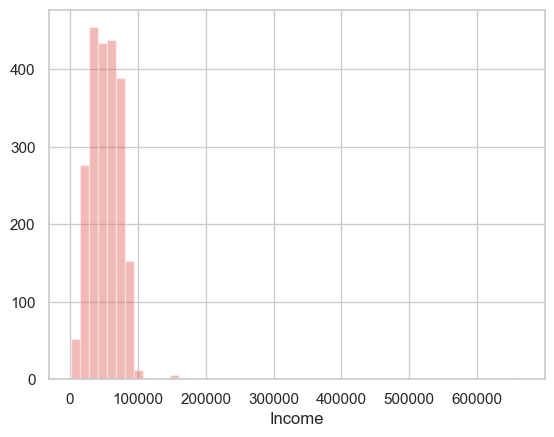

In [21]:
# mengisi missing values dengan mean/median tergantung distribusi data
# kita lihat dulu distribusi datanya
sns.distplot(dataku['Income'],  kde=False, hist=True);

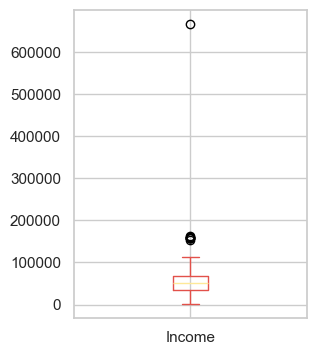

In [22]:
dataku['Income'].plot(kind='box', figsize=(3,4));

Visualisasi di atas menunjukkan bahwa `Income` memiliki beberapa outlier
pada sisi kanan (right-skewed). Kondisi ini membuat median lebih tepat
digunakan untuk imputasi karena median tidak terpengaruh oleh nilai ekstrem.

In [23]:
dataku['Income'] = dataku['Income'].fillna(dataku['Income'].median())

Missing value pada kolom `Income` kini telah berhasil diisi dengan nilai
median. Dengan demikian, dataset siap untuk dilanjutkan ke tahap eksplorasi
lanjutan dan feature engineering.

### 2.4 Pemeriksaan Outlier dengan Boxplot

Setelah menangani missing value, langkah berikutnya adalah
memeriksa apakah terdapat outlier pada fitur-fitur numerik.

Outlier yang ekstrem dapat:
- mengganggu interpretasi statistik,
- dan memengaruhi hasil pemodelan.

Untuk itu:
1. Kita akan memilih hanya kolom bertipe numerik (`float` dan `int`).
2. Menghapus beberapa kolom yang tidak relevan untuk analisis outlier global
   (misalnya ID dan kolom campaign yang berupa flag 0/1).
3. Membuat boxplot untuk melihat sebaran dan potensi outlier.


In [24]:
dataku_to_plot = dataku.select_dtypes(include=['float','int'])
dataku_to_plot.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                   'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],
                         inplace=True)

Kolom numerik dipilih agar visualisasi lebih fokus pada variabel kontinu.
Kolom seperti `ID`, flag campaign (`AcceptedCmp*`), `Response`, dan `Complain`
dihilangkan dari visualisasi karena berupa indikator 0/1 dan kurang informatif
untuk analisis outlier dengan boxplot.

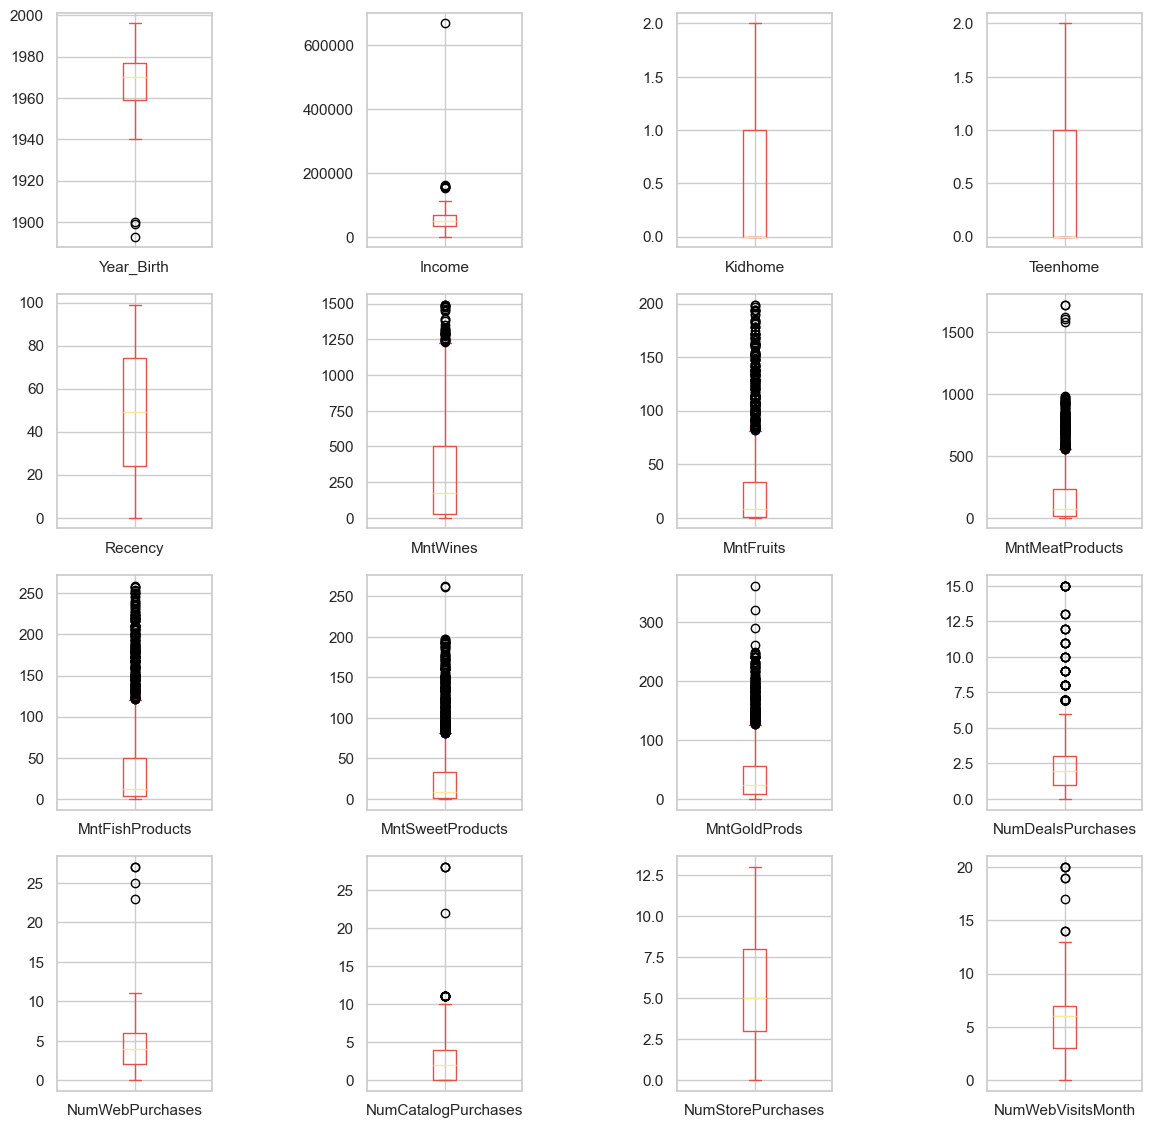

In [25]:
dataku_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(14,14))
plt.subplots_adjust(wspace=1)

Dari boxplot terlihat bahwa:

- Sebagian besar fitur numerik memiliki sebaran nilai yang masih wajar.
- Namun, pada fitur `Year_Birth` terdapat beberapa nilai tahun kelahiran
  yang sangat kecil (terlalu tua) dan tidak realistis untuk konteks customer saat ini.

Nilai `Year_Birth` yang terlalu kecil ini dianggap sebagai outlier yang
perlu dihapus agar tidak mengganggu analisis.


In [26]:
dataku = dataku[dataku['Year_Birth'] > 1900].reset_index(drop=True)

Setelah filtering, hanya customer dengan `Year_Birth > 1900` yang disertakan
dalam dataset. Hal ini membuat data lebih realistis dan mengurangi pengaruh
outlier yang tidak masuk akal.

### 2.5 Distribusi Fitur Numerik

Setelah menghapus outlier yang tidak masuk akal, kita perlu melihat
bagaimana distribusi setiap fitur numerik di dataset.

Tujuannya:
- memahami bentuk distribusi (normal, skewed, dll.),
- dan mengidentifikasi fitur-fitur yang mungkin memerlukan transformasi
  pada tahap pemodelan.

Berikut langkahnya:
1. Menyimpan daftar nama kolom numerik yang akan divisualisasikan.
2. Membuat histogram untuk masing-masing fitur numerik.


In [27]:
numeric = dataku_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

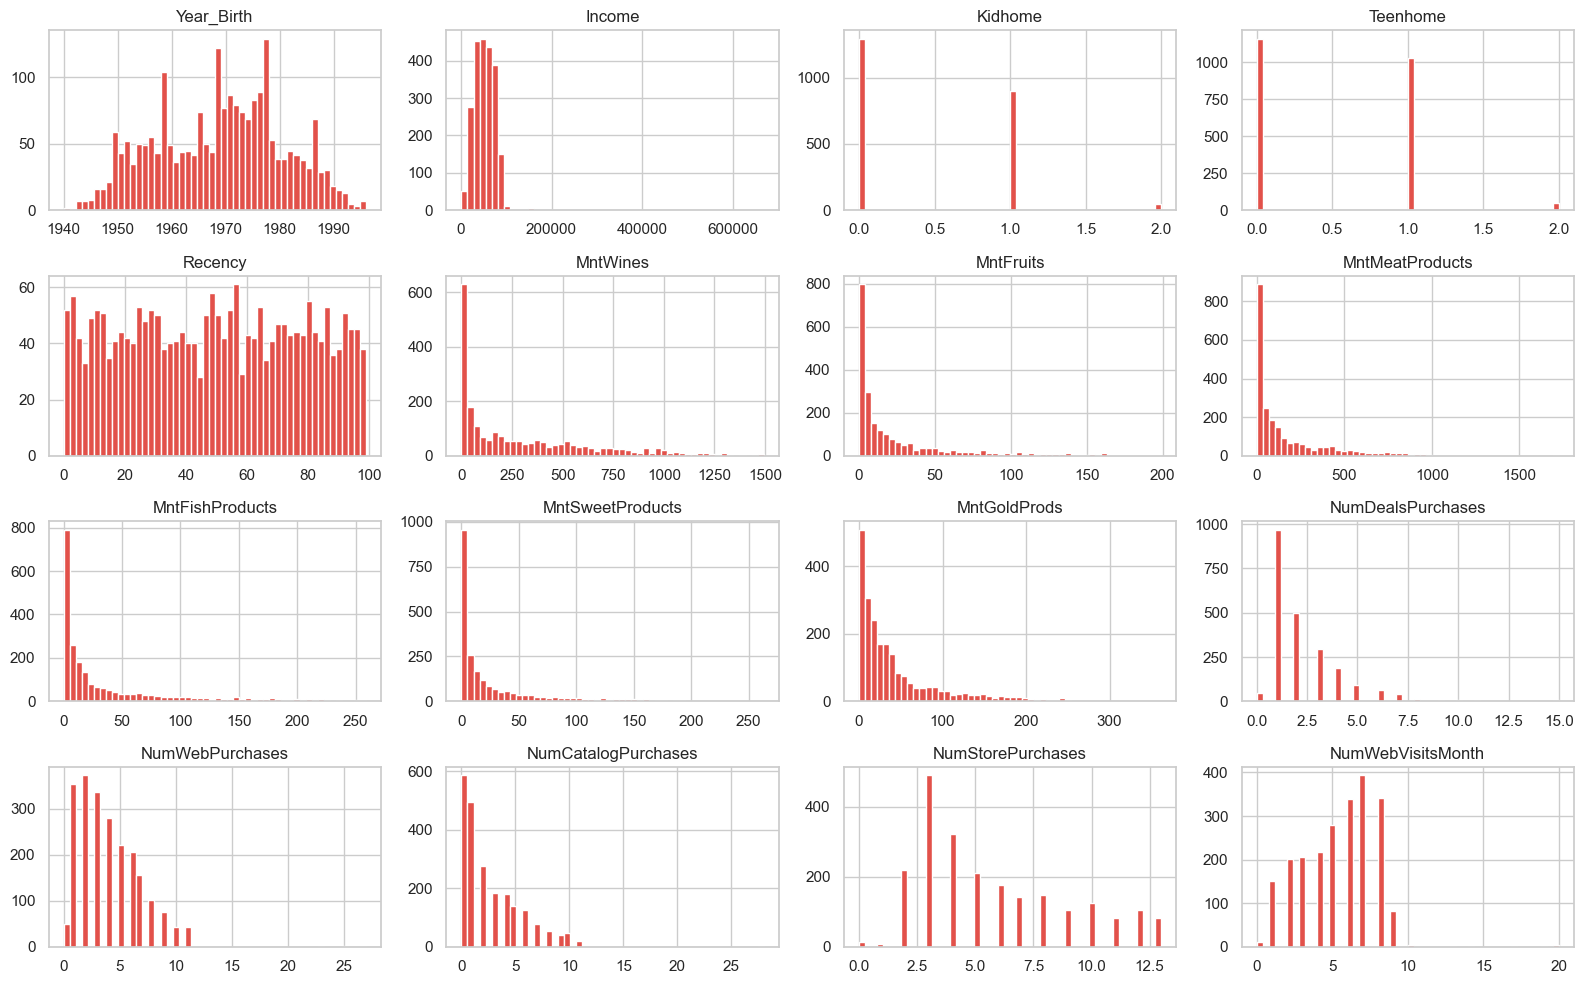

In [28]:
fig = plt.figure(figsize=(16,10))

ax = plt.gca()

dataku.hist(bins=50,  ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()


Histogram di atas menunjukkan pola distribusi untuk setiap fitur numerik.

Beberapa catatan umum:
- Beberapa fitur memiliki distribusi yang miring (skewed), misalnya pada
  pengeluaran tertentu (`Mnt*`) dan frekuensi pembelian, yang wajar untuk
  data transaksi.
- Informasi ini akan berguna pada tahap pemodelan, terutama dalam pemilihan
  metode imputasi, transformasi, dan interpretasi hasil model.

Dengan selesainya tahap ini, data numerik sudah:
- bebas dari nilai tahun kelahiran yang tidak logis, dan
- distribusinya sudah dipahami secara global.

Selanjutnya dataset siap untuk masuk ke tahap **Feature Engineering** dan EDA yang lebih terarah.

## Data Insight

In [29]:
dataku.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


### 3.1 Pengaruh usia terhadap Response Campaign

Langkah pertama adalah melihat apakah tingkat pendidikan customer
berpengaruh terhadap keputusan menerima campaign.

Kolom `Year_Birth` menunjukkan tahun kelahiran customer. Namun, tahun kelahiran
tidak intuitif saat digunakan dalam analisis. Oleh karena itu, kita ubah menjadi
`Customer_Age`, yang menunjukkan usia customer saat data dikumpulkan.

Perhitungan dilakukan dengan mengurangkan tahun sekarang dari `Year_Birth`.


In [30]:
dataku['Customer_Age'] = dataku['Dt_Customer'].dt.year - dataku['Year_Birth']

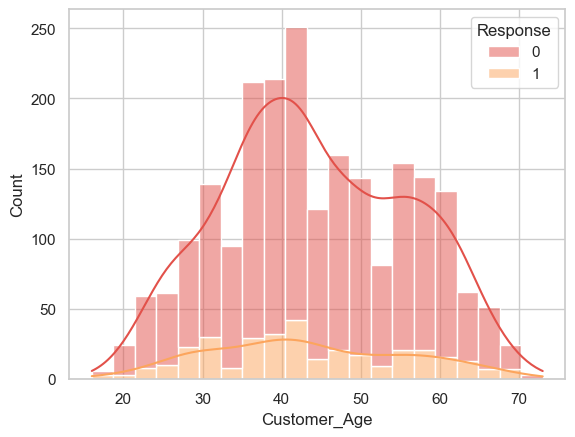

In [31]:
sns.histplot(data=dataku, x='Customer_Age', hue='Response', multiple='stack', kde=True);

Dengan adanya fitur `Customer_Age`, kini kita dapat dengan mudah melakukan
analisis segmentasi usia, misalnya untuk melihat kelompok umur mana yang lebih
banyak menerima campaign.

### 3.2 Pengaruh Tingkat Pendidikan terhadap Response Campaign
Variabel `Education` memiliki beberapa kategori seperti Basic, Graduation,
Master, dan PhD. Kita akan visualisasikan jumlah masing-masing kategori,
dibagi berdasarkan `Response`.

In [32]:
dataku.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

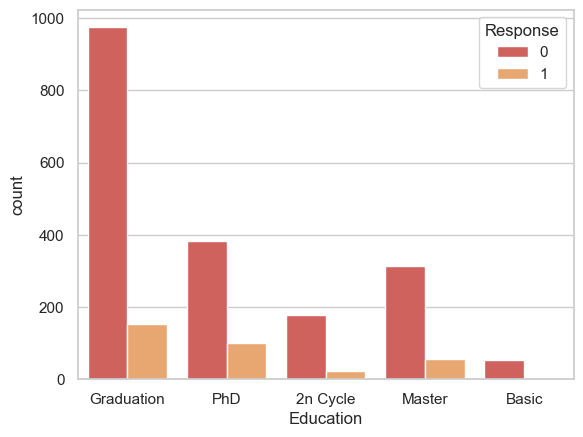

In [33]:
sns.countplot(data=dataku, x='Education', hue='Response');

### 📌 Insight

Terlihat bahwa customer dengan tingkat pendidikan **PhD** memiliki proporsi
penerimaan campaign tertinggi. Hal ini dapat mengindikasikan bahwa customer
berpendidikan tinggi:
- lebih memahami nilai produk,
- dan cenderung lebih responsif terhadap penawaran marketing.


In [34]:
def barPerc(dataku, xVar, ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        dataku:  pandas dataframe
        xVar: (string) X variable
        ax:  Axes object (untuk seaborn countplot/barplot
             atau pandas bar plot)
    '''

    # 1. Berapa banyak kategori di sumbu X
    #    Cek NaN dan buang
    numX = len([x for x in dataku[xVar].unique() if x == x])

    # 2. Ambil semua bar yang sudah digambar di axis
    bars = ax.patches

    # 2a. Untuk tiap kategori X
    for ind in range(numX):

        # 2b. Ambil semua bar "hue" untuk kategori X ini
        #     Contoh: 8 kategori X, 4 hue =>
        #     [0, 8, 16, 24] adalah bar utk kategori X pertama
        hueBars = bars[ind::numX]

        # 2c. Total tinggi semua bar di kategori X ini
        total = sum([b.get_height() for b in hueBars])

        # 3. Tulis persentase di atas masing-masing bar
        for bar in hueBars:
            ax.text(
                bar.get_x() + bar.get_width()/2.,   # posisi X teks (tengah bar)
                bar.get_height(),                   # posisi Y (di atas bar)
                f'{bar.get_height()/total:.0%}',   # teks persentase, misal 35%
                ha='center',
                va='bottom'
            )


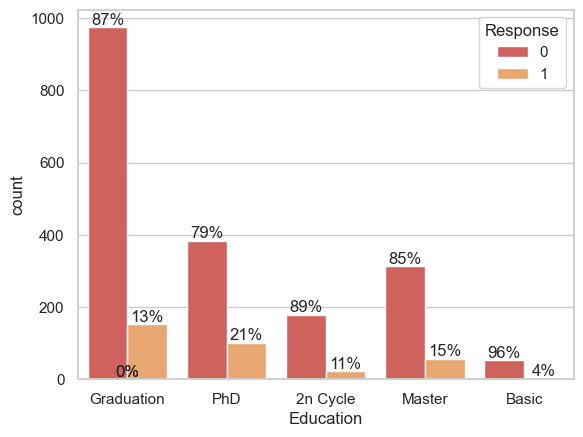

In [35]:
ax = sns.countplot(x = 'Education', hue='Response', data=dataku)
barPerc(dataku, 'Education', ax)

# PhD memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

(0.0, 175000.0)

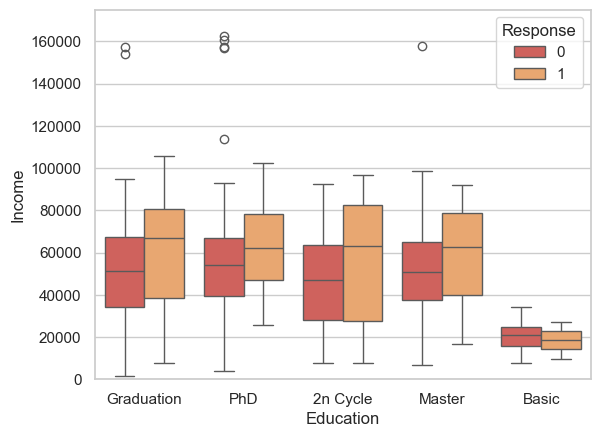

In [36]:
sns.boxplot(data= dataku, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

### 3.2 Apakah Status Pernikahan Mempengaruhi Campaign?

Beberapa kategori status pernikahan kurang relevan seperti `YOLO`, `Alone`,
dan `Absurd`. Kita gabungkan ke dalam kategori `Single`.


In [37]:
dataku.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [38]:
dataku.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [39]:
dataku['Marital_Status'] = dataku['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

In [40]:
dataku.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

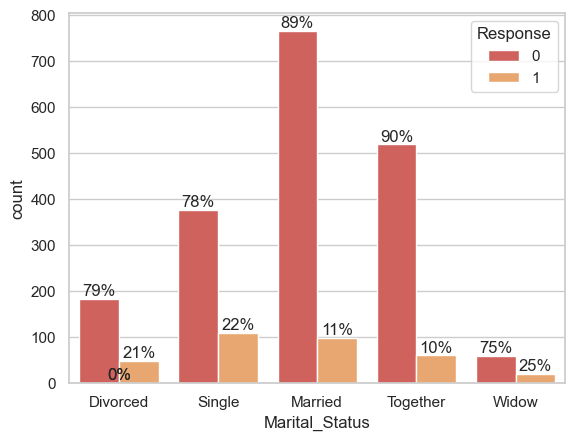

In [41]:
ax = sns.countplot(x = 'Marital_Status', hue='Response', data=dataku)
barPerc(dataku, 'Marital_Status', ax)

# Ada Kecendurungan jika customer membiayai hidup sendiri cenderung membeli atau menerima penawaran campagin

Customer yang **Single** memiliki kecenderungan lebih tinggi untuk menerima campaign,
kemungkinan karena pengambilan keputusan lebih independen (tidak perlu diskusi keluarga).


### 3.4 Pengaruh Jumlah Tanggungan

Fitur `Kidhome` + `Teenhome` digabung menjadi `Num_Dependents`.


In [42]:
dataku.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [43]:
dataku['Num_Dependents'] = dataku['Kidhome'] + dataku['Teenhome']

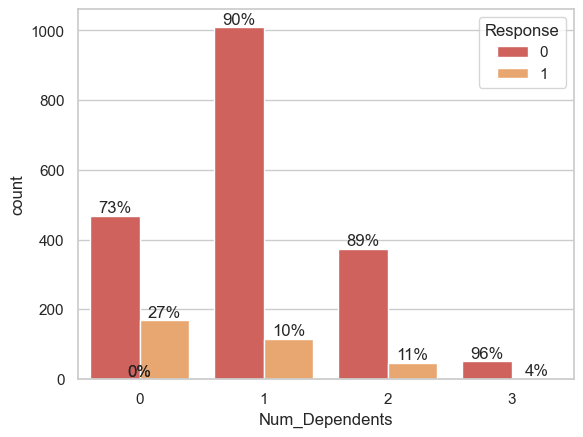

In [44]:
ax = sns.countplot(x = 'Num_Dependents', hue='Response', data=dataku)
barPerc(dataku, 'Num_Dependents', ax)

# Customer yang tinggal sendiri cenderung menerima campaign

Customer yang tinggal sendiri (dependents = 0) lebih banyak menerima campaign.
Mereka cenderung lebih fleksibel dalam pengeluaran dan pengambilan keputusan.

### 3.5 Analisis Lama Customer Bergabung

Kita melihat tahun dan bulan pertama kali customer melakukan transaksi.


In [45]:
dataku['Dt_Customer_Year'] = dataku['Dt_Customer'].dt.year
dataku['Dt_Customer_Month'] = dataku['Dt_Customer'].dt.month

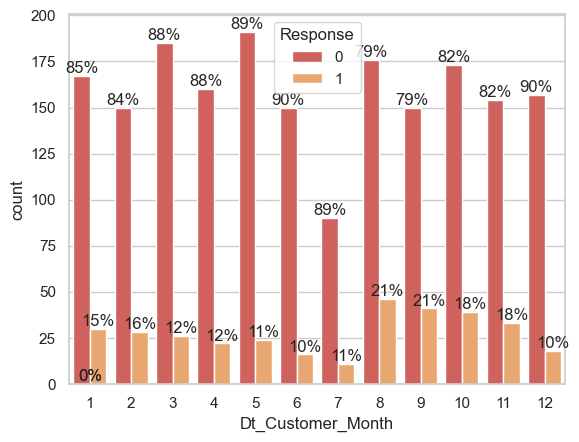

In [46]:
ax = sns.countplot(x = 'Dt_Customer_Month', hue='Response', data=dataku)
barPerc(dataku, 'Dt_Customer_Month', ax)


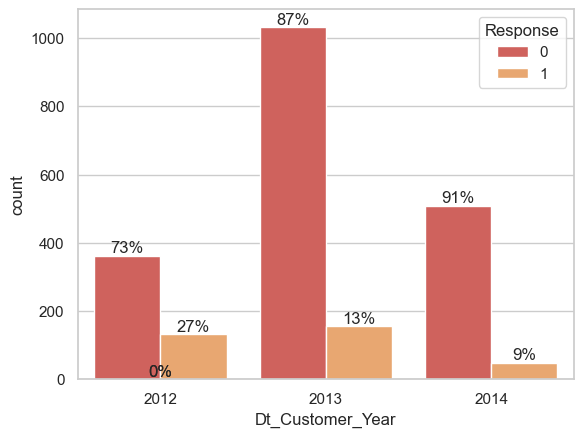

In [47]:
ax = sns.countplot(x = 'Dt_Customer_Year', hue='Response', data=dataku)
barPerc(dataku, 'Dt_Customer_Year', ax)

# Semakin lama customer sudah join maka semakin besar kemungkinan customer akan menerima penawaran campaign

Semakin lama customer bergabung, semakin besar peluang menerima campaign.
Loyal customer biasanya:
- telah mencoba produk sebelumnya,
- dan memiliki kepercayaan terhadap brand.


### 3.6 Analisis Recency

Recency menunjukkan berapa hari sejak pembelian terakhir.
Semakin kecil nilai recency → semakin baru mereka membeli.


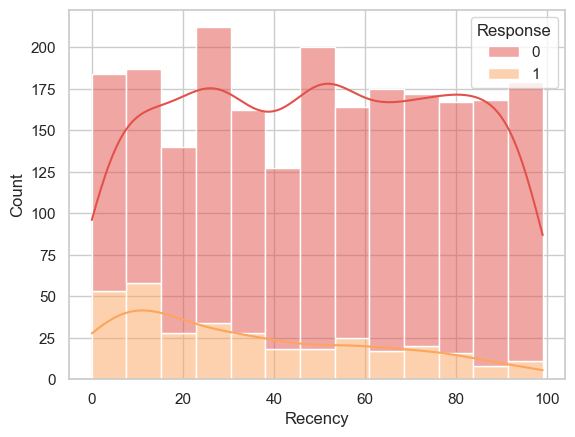

In [48]:
sns.histplot(data=dataku, x='Recency', hue='Response', multiple='stack', kde=True);

# Customer yang belum lama membeli,maka cenderung akan menerima penawaran campaign terbaru

Customer yang baru saja membeli (Recency rendah) lebih responsif terhadap campaign,
karena mereka masih aktif dan engaged dengan brand.

### 3.7 Total Pengeluaran Customer

Semakin banyak customer mengeluarkan uang, semakin besar peluang mereka menerima campaign.


In [49]:
amt_spent_features = [ c for c in dataku.columns if 'Mnt' in str(c) ]
amt_spent_features.append('Response')

In [50]:
dataku[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [51]:
dataku['TotalAmount_Spent'] = dataku[amt_spent_features].sum(axis=1)

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

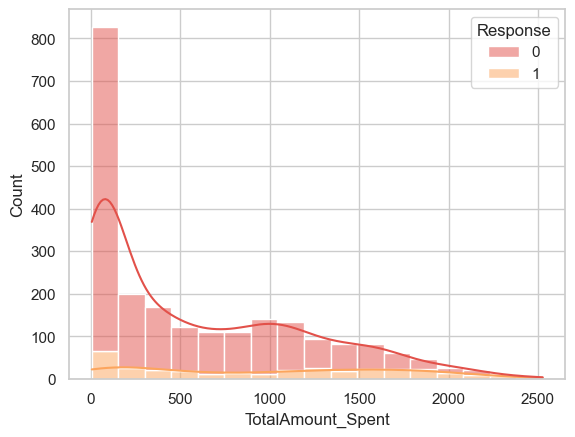

In [52]:
sns.histplot(data=dataku, x='TotalAmount_Spent',  kde='False', hue='Response', multiple='stack')

# jika customer sudah meng-spent moneynya di sekitar 1000-2000 dolar maka customer ini cenderung menerima penawaran campaign

Customer yang menghabiskan **$1000–$2000** memiliki peluang tertinggi menerima campaign.
Ini adalah segmen yang menarik untuk strategi upselling.

### 3.8 Total Aktivitas Pembelian Customer


In [53]:
purchases_feature = [c for c in dataku.columns if 'Purchases' in str(c)]
purchases_feature.append('Response')

In [54]:
dataku[purchases_feature].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [55]:
dataku['Totalpurchases_feature'] = dataku[purchases_feature].sum(axis=1)

<Axes: xlabel='Totalpurchases_feature', ylabel='Count'>

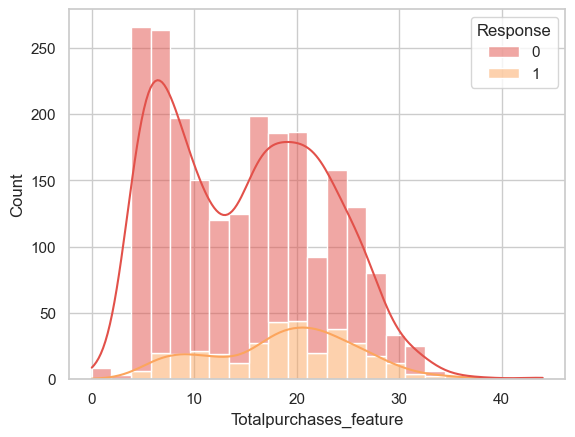

In [56]:
sns.histplot(data=dataku, x='Totalpurchases_feature',  kde='False', hue='Response', multiple='stack')

# tidak ada pola unik, atau pemisah antara response 0 dan 1

Tidak ada pola signifikan — frekuensi pembelian tidak menjadi pembeda kuat
antara customer yang menerima campaign vs tidak.

### 3.9 NumWebVisitMonth

NumWebVisitsMonth dan campaign sebelumnya (`AcceptedCmp*`) tidak memiliki korelasi berarti
terhadap Response secara langsung.


In [57]:
dataku[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

# tidak memiliki korelasi terhadap response

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


### Previous Campaign

In [58]:
prev_cmp = [c for c in dataku.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')

In [59]:
dataku[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


### 3.10 Complain

In [60]:
dataku[['Complain', 'Response']].corr()[['Response']]

# tidak memiliki korelasi terhadap response

,Response
Complain,0.000185
Response,1.000000


### 3.11 Country
Customer dari **Mexico** dan **Spain** tercatat paling responsif terhadap campaign.
Ini bisa menjadi fokus geografis untuk marketing berikutnya.

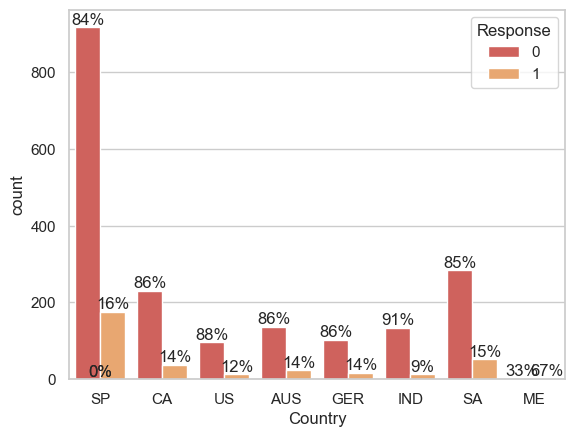

In [61]:

ax = sns.countplot(x='Country', hue='Response', data=dataku)
barPerc(dataku, 'Country', ax)

# Mexico dan Spain adaladh negara yang cenerung akan meneriwa campaign terabru

Customer dari **Mexico** dan **Spain** tercatat paling responsif terhadap campaign.
Ini bisa menjadi fokus geografis untuk marketing berikutnya.


### 4.1 Train–Validation–Test Split

Dataset dibagi menjadi 3 bagian:

- **Train (60%)** → digunakan untuk melatih model
- **Validation (20%)** → untuk tuning parameter model
- **Test (20%)** → untuk mengukur performa akhir pada data yang belum pernah dilihat model

Pembagian dilakukan sebelum preprocessing untuk menghindari data leakage.


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
dataku_full_train, dataku_test = train_test_split(dataku, test_size=0.2, random_state=1)
dataku_train, dataku_valid = train_test_split(dataku_full_train, test_size=0.25, random_state=1)

### 4.2 Standardisasi Tipe Data

Beberapa kolom masih mengandung spasi dan `Dt_Customer` belum
bertipe datetime. Kita perbaiki agar konsisten.


In [64]:
dataku_train.columns = dataku_train.columns.str.replace(' ','')
dataku_valid.columns = dataku_valid.columns.str.replace(' ','')
dataku_test.columns = dataku_test.columns.str.replace(' ','')

In [65]:
#mengubah data type Dt_customer menjadi Date_time
dataku_train['Dt_Customer'] = pd.to_datetime(dataku_train['Dt_Customer'])


dataku_valid['Dt_Customer'] = pd.to_datetime(dataku_valid['Dt_Customer'])

dataku_test['Dt_Customer'] = pd.to_datetime(dataku_test['Dt_Customer'])

### 4.3 Imputasi Missing Value

Kolom `Income` masih memiliki nilai kosong. Kita isi menggunakan median
hanya dari data training untuk mencegah data leakage.


In [66]:
dataku_train['Income'] = dataku_train['Income'].fillna(dataku_train['Income'].median())
dataku_valid['Income'] = dataku_valid['Income'].fillna(dataku_valid['Income'].median())
dataku_test['Income'] = dataku_test['Income'].fillna(dataku_test['Income'].median())

### 4.4 Menghapus Outlier Tidak Realistis

Tahun kelahiran < 1900 dianggap tidak valid, sehingga kita hapus.


In [67]:
dataku_train = dataku_train[dataku_train['Year_Birth'] > 1900].reset_index(drop=True)
dataku_valid = dataku_valid[dataku_valid['Year_Birth'] > 1900].reset_index(drop=True)
dataku_test = dataku_test[dataku_test['Year_Birth'] > 1900].reset_index(drop=True)

### 4.5 Feature Engineering

Di tahap ini, kita membuat fitur baru yang merepresentasikan
perilaku customer secara lebih baik.


In [68]:
# customer_Age
dataku_train['Customer_Age'] = dataku_train['Dt_Customer'].dt.year - dataku_train['Year_Birth']
dataku_valid['Customer_Age'] = dataku_valid['Dt_Customer'].dt.year - dataku_valid['Year_Birth']
dataku_test['Customer_Age'] = dataku_test['Dt_Customer'].dt.year - dataku_test['Year_Birth']

In [69]:
# Marital Category Cleanup
dataku_train['Marital_Status'] = dataku_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))
dataku_valid['Marital_Status'] = dataku_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))
dataku_test['Marital_Status'] = dataku_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

In [70]:
# Dependents Feature
dataku_train['Num_Dependents'] = dataku_train['Kidhome'] + dataku_train['Teenhome']
dataku_valid['Num_Dependents'] = dataku_valid['Kidhome'] + dataku_valid['Teenhome']
dataku_test['Num_Dependents'] = dataku_test['Kidhome'] + dataku_test['Teenhome']

In [71]:
# Join Date Features
dataku_train['Dt_Customer_Year'] = dataku_train['Dt_Customer'].dt.year
dataku_train['Dt_Customer_Month'] = dataku_train['Dt_Customer'].dt.month

dataku_valid['Dt_Customer_Year'] = dataku_valid['Dt_Customer'].dt.year
dataku_valid['Dt_Customer_Month'] = dataku_valid['Dt_Customer'].dt.month

dataku_test['Dt_Customer_Year'] = dataku_test['Dt_Customer'].dt.year
dataku_test['Dt_Customer_Month'] = dataku_test['Dt_Customer'].dt.month

In [72]:
# Total Amount Spent
amt_spent_features = [ c for c in dataku.columns if 'Mnt' in str(c) ]
dataku_train['TotalAmount_Spent'] = dataku_train[amt_spent_features].sum(axis=1)
dataku_valid['TotalAmount_Spent'] = dataku_valid[amt_spent_features].sum(axis=1)
dataku_test['TotalAmount_Spent'] = dataku_test[amt_spent_features].sum(axis=1)

In [73]:
# Total Purchases
purchases_feature = [c for c in dataku.columns if 'Purchases' in str(c)]
dataku_train['Totalpurchases_feature'] = dataku_train[purchases_feature].sum(axis=1)
dataku_valid['Totalpurchases_feature'] = dataku_valid[purchases_feature].sum(axis=1)
dataku_test['Totalpurchases_feature'] = dataku_test[purchases_feature].sum(axis=1)

In [74]:
display(dataku_train.head())
print()
display(dataku_valid.head())
print()
display(dataku_test.head())
print()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependents,Dt_Customer_Year,Dt_Customer_Month,TotalAmount_Spent,Totalpurchases_feature
0,4653,1978,Graduation,Together,42011.0,1,0,2013-03-26,46,131,0,16,2,1,39,4,3,1,4,8,0,0,0,0,0,0,0,SA,35,1,2013,3,189,12
1,10492,1959,Graduation,Together,38285.0,2,1,2014-06-24,96,2,0,5,2,0,1,1,0,0,3,2,0,0,0,0,0,0,0,IND,55,3,2014,6,10,4
2,4399,1969,Graduation,Together,68695.0,0,0,2014-06-25,3,458,81,356,106,50,40,1,4,4,7,2,0,0,0,0,0,0,0,CA,45,0,2014,6,1091,16
3,6983,1950,Master,Divorced,38054.0,1,1,2014-05-01,24,23,2,17,2,1,0,2,2,0,3,7,0,0,0,0,0,0,0,IND,64,2,2014,5,45,7
4,5113,1971,PhD,Divorced,86979.0,0,0,2013-11-07,67,584,100,835,65,83,35,1,5,5,5,2,1,0,0,0,0,1,0,SP,42,0,2013,11,1702,16


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependents,Dt_Customer_Year,Dt_Customer_Month,TotalAmount_Spent,Totalpurchases_feature
0,1044,1953,Graduation,Together,58398.0,0,0,2013-05-14,44,299,5,201,21,21,49,3,5,4,8,4,0,0,0,0,0,0,0,AUS,60,0,2013,5,596,20
1,5316,1976,Master,Together,21024.0,0,0,2013-07-04,89,36,4,18,6,2,18,1,2,0,4,7,0,0,0,0,0,0,0,SP,37,0,2013,7,84,7
2,11039,1975,Graduation,Married,51948.0,0,1,2013-09-17,51,82,33,54,71,30,41,2,5,2,4,5,0,0,0,0,0,0,0,SP,38,1,2013,9,311,13
3,4548,1981,Graduation,Single,41967.0,1,1,2013-11-23,66,23,4,10,0,2,15,1,1,0,3,4,0,0,0,0,0,0,0,CA,32,2,2013,11,54,5
4,6299,1968,PhD,Divorced,42564.0,0,1,2013-01-02,28,324,48,186,39,18,198,6,6,8,4,7,1,0,0,0,0,1,0,CA,45,1,2013,1,813,24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependents,Dt_Customer_Year,Dt_Customer_Month,TotalAmount_Spent,Totalpurchases_feature
0,7326,1971,Master,Married,56850.0,0,1,2014-03-23,83,34,1,19,2,7,0,1,1,1,3,2,0,0,0,0,0,0,0,CA,43,1,2014,3,63,6
1,5272,1965,Master,Married,53843.0,0,1,2013-06-27,64,378,0,88,19,4,73,4,8,5,3,7,0,0,0,0,0,0,0,SA,48,1,2013,6,562,20
2,8692,1952,Graduation,Together,43462.0,1,1,2012-09-12,50,90,17,97,15,6,15,6,4,1,5,8,0,0,0,0,0,0,0,SP,60,2,2012,9,240,16
3,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,1,0,US,66,0,2012,11,1315,26
4,10741,1951,Master,Together,47352.0,0,1,2013-04-11,70,172,12,112,8,0,15,4,6,1,5,7,0,0,0,0,0,0,0,SP,62,1,2013,4,319,16


### 4.6 Seleksi Fitur dan Encoding

Model machine learning hanya menerima input numerik.
Maka fitur kategorikal perlu diubah menjadi fitur numerik menggunakan
`DictVectorizer`.


In [75]:
cmp_feat = [c for c in dataku.columns if 'AcceptedCmp' in str(c)]
mnt_feat = [c for c in dataku.columns if 'Mnt' in str(c)]
num_feat = [c for c in dataku.columns if 'Num' in str(c)]

In [76]:
numeric_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                'Num_Dependents', 'Dt_Customer_Month', 'Dt_Customer_Year', 'TotalAmount_Spent', 'Totalpurchases_feature']

In [77]:
all_numeric_feat = cmp_feat + mnt_feat + num_feat + numeric_feat

In [78]:
categoric_feat = ['Education', 'Marital_Status', 'Country']

In [79]:
all_feat = all_numeric_feat + categoric_feat

In [80]:
dataku_train_final = dataku_train[all_feat]
dataku_valid_final = dataku_valid[all_feat]
dataku_test_final = dataku_test[all_feat]

In [81]:
dataku_train.Education.unique()

array(['Graduation', 'Master', 'PhD', '2n Cycle', 'Basic'], dtype=object)

In [82]:
Education = {'Basic':1, 'Graduation':2, '2n Cycle':3, 'Master':4, 'PhD':5}

In [83]:
dataku_train_final['Education'] = dataku_train_final['Education'].map(Education)
dataku_valid_final['Education'] = dataku_valid_final['Education'].map(Education)
dataku_test_final['Education'] = dataku_test_final['Education'].map(Education)

In [84]:
from sklearn.feature_extraction import DictVectorizer

In [85]:
dv = DictVectorizer(sparse=False)

In [86]:
dataku_train_final_dicts = dataku_train_final.to_dict(orient='records')
dataku_valid_final_dicts = dataku_valid_final.to_dict(orient='records')
dataku_test_final_dicts = dataku_test_final.to_dict(orient='records')

In [87]:
dataku_train_final_dicts = dv.fit_transform(dataku_train_final_dicts)
dataku_valid_final_dicts = dv.transform(dataku_valid_final_dicts)
dataku_test_final_dicts = dv.transform(dataku_test_final_dicts)

In [88]:
dataku_train_final = pd.DataFrame(dataku_train_final_dicts, columns = dv.get_feature_names_out())
dataku_valid_final = pd.DataFrame(dataku_valid_final_dicts, columns = dv.get_feature_names_out())
dataku_test_final = pd.DataFrame(dataku_test_final_dicts, columns = dv.get_feature_names_out())

In [89]:
dataku_train_final.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Num_Dependents,Recency,Teenhome,TotalAmount_Spent,Totalpurchases_feature
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0,3.0,2013.0,2.0,42011.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,39.0,16.0,1.0,131.0,1.0,4.0,4.0,3.0,8.0,1.0,46.0,0.0,189.0,12.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,55.0,6.0,2014.0,2.0,38285.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,5.0,0.0,2.0,0.0,1.0,3.0,0.0,2.0,3.0,96.0,1.0,10.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,6.0,2014.0,2.0,68695.0,0.0,0.0,0.0,0.0,1.0,0.0,106.0,81.0,40.0,356.0,50.0,458.0,4.0,1.0,7.0,4.0,2.0,0.0,3.0,0.0,1091.0,16.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,64.0,5.0,2014.0,4.0,38054.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,17.0,1.0,23.0,0.0,2.0,3.0,2.0,7.0,2.0,24.0,1.0,45.0,7.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.0,11.0,2013.0,5.0,86979.0,0.0,1.0,0.0,0.0,0.0,0.0,65.0,100.0,35.0,835.0,83.0,584.0,5.0,1.0,5.0,5.0,2.0,0.0,67.0,0.0,1702.0,16.0


🚀 5. Model Development & Evaluation
🎯 Tujuan

Pada tahap ini, kita membangun model machine learning untuk memprediksi apakah seorang customer akan menerima campaign (Response = 1) berdasarkan karakteristik mereka.

Model yang digunakan:

Logistic Regression → baseline model (sederhana, interpretable)

Random Forest Classifier → model non-linear berbasis tree ensemble

Metrik evaluasi yang dipakai:

📌 ROC-AUC (Receiver Operating Characteristic – Area Under Curve)

Mengukur kemampuan model dalam membedakan antara kelas:

Semakin mendekati 1 → semakin baik

ROC-AUC lebih tepat dibanding accuracy pada data imbalance

### 5.1 Menentukan Variabel Independent dan Dependent

- `X` berisi seluruh fitur yang akan digunakan untuk prediksi
- `y` adalah target yang ingin diprediksi, yaitu kolom `Response`


In [90]:
x_train_final = dataku_train_final
x_valid_final = dataku_valid_final
x_test_final = dataku_test_final

In [91]:
y_train_final = dataku_train.Response
y_valid_final = dataku_valid.Response
y_test_final = dataku_test.Response

### 5.2 Logistic Regression

Logistic Regression adalah model dasar yang biasa digunakan untuk
klasifikasi biner. Model ini menghitung probabilitas customer menerima
campaign berdasarkan bobot linear dari setiap fitur.


In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
model = LogisticRegression(random_state=42)
model.fit(x_train_final, y_train_final)

LogisticRegression(random_state=42)

In [95]:
y_valid_pred = model.predict_proba(dataku_valid_final)[:, 1]

In [96]:
print('LogisticRegression ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.75


Model Logistic Regression memberikan nilai ROC-AUC sebesar **0.75**.
Nilai ini menjadi baseline pembanding sebelum mencoba model yang lebih kompleks.


### 5.3 Random Forest Classifier

Random Forest adalah model berbasis pohon keputusan (tree-based ensemble)
yang mampu menangkap hubungan non-linear antar fitur. Model ini biasanya
memiliki performa lebih baik dibanding Logistic Regression karena:

✔ mampu menangani variabel numerik & kategorikal  
✔ robust terhadap outliers  
✔ mampu menangkap interaksi antar fitur


In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [99]:
y_valid_pred = model.predict_proba(dataku_valid_final)[:, 1]
print('RandomForestCllassifier ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

RandomForestCllassifier ROCAUC Result: 0.901


ROC-AUC model Random Forest lebih tinggi dibanding Logistic Regression,
menunjukkan bahwa pola penerimaan campaign customer tidak sepenuhnya linear
dan membutuhkan model yang dapat menangkap interaksi fitur.

### 6. Final Model Training

Setelah melakukan validasi dan memilih model terbaik (Random Forest),
model dilatih ulang menggunakan gabungan data **train + validation**
(`full_train`) untuk memaksimalkan pembelajaran, kemudian dievaluasi
menggunakan data **test** yang benar-benar belum pernah dilihat model.


In [100]:
x_full_train_final = pd.concat([x_train_final, x_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [101]:
model = RandomForestClassifier(random_state=42)
model.fit(x_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [102]:
y_test_pred = model.predict_proba(x_test_final)[:, 1]

print('RandomForestClassifier ROCAUC Result:', roc_auc_score(y_test_final, y_test_pred).round(3))

RandomForestClassifier ROCAUC Result: 0.912


ROC-AUC test menghasilkan skor **0.912**, menunjukkan bahwa model mampu
membedakan customer yang akan menerima campaign dengan tingkat akurasi probabalistik yang baik.

Karena pengujian dilakukan pada data baru (test set), skor ini mencerminkan
kinerja model yang realistis dalam produksi.


### 7. Interpretasi Model menggunakan SHAP

Meskipun Random Forest memiliki performa tinggi, model berbasis pohon
memiliki sifat "black-box". Untuk memahami *mengapa* model membuat keputusan
tertentu, kita menggunakan **SHAP (SHapley Additive exPlanations)**.

SHAP membantu menjawab pertanyaan penting:
**Fitur apa yang paling mempengaruhi customer menerima campaign?**


In [103]:
import shap

In [104]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test_final)

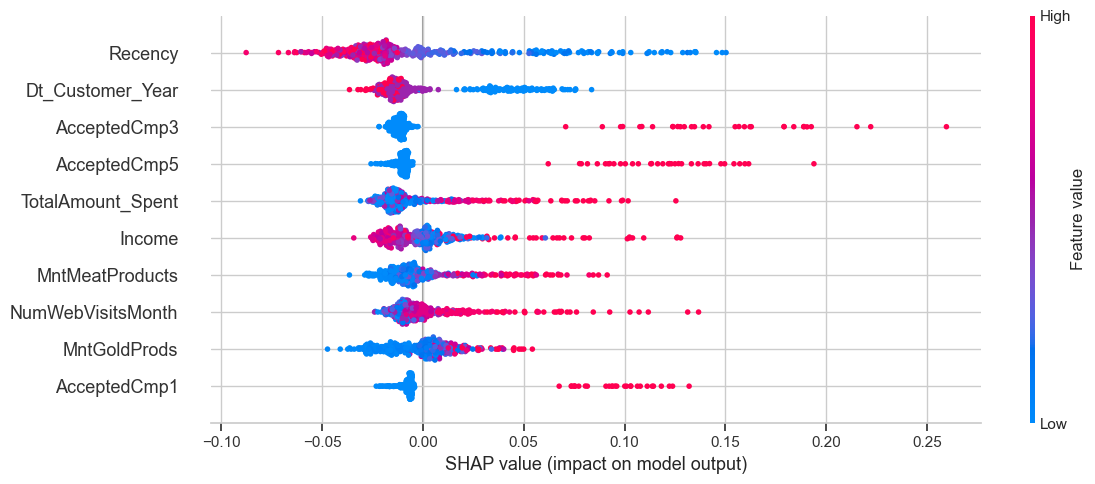

In [105]:
# pilih shap untuk kelas positif
shap_values_pos = shap_values[:, :, 1]

plt.title('SHAP Summary for top 10 feature', size=16)
shap.summary_plot(shap_values_pos, x_test_final, max_display=10, plot_size=[12,5])

🏆 8. Business Insights

Bagian ini menjawab pertanyaan bisnis dari dataset — ini yang dicari HRD dan hiring manager.

In [106]:
# 8.1 Produk Apa yang Paling Sukses?
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts','MntSweetProducts','MntGoldProds']
dataku[product_cols].sum().sort_values(ascending=False)

MntWines            680038
MntMeatProducts     373393
MntGoldProds         98358
MntFishProducts      83939
MntSweetProducts     60553
MntFruits            58767
dtype: int64

Produk dengan revenue tertinggi adalah **Wine**. Ini menunjukkan bahwa
campaign masa depan berpotensi besar untuk diarahkan kepada customer
yang pernah membeli wine atau berada di segmen premium.


In [107]:
# 8.2 Channel Mana yang Underperform?
channels_cols = ['NumWebPurchases','NumCatalogPurchases',
                'NumStorePurchases','NumWebVisitsMonth']

dataku[channels_cols].sum().sort_values()

NumCatalogPurchases     5956
NumWebPurchases         9143
NumWebVisitsMonth      11899
NumStorePurchases      12962
dtype: int64

Channel dengan performa terendah adalah **Catalog Purchases**.

Hal ini menunjukkan bahwa metode katalog sudah tidak efektif dan dapat
dipertimbangkan untuk:
- dioptimasi ulang,
- atau dialihkan budget-nya ke channel lain.


In [108]:
# 8.3 Channel Mana yang Best Perform?
dataku.groupby('Response')[channels_cols].mean().T.sort_values(by=1, ascending=False)

Response,0,1
NumStorePurchases,5.741461,6.095808
NumWebVisitsMonth,5.323699,5.293413
NumWebPurchases,3.914346,5.071856
NumCatalogPurchases,2.392013,4.203593


Channel **Store Purchases** memiliki tingkat conversion tertinggi dari customer
yang menerima campaign. Artinya interaksi fisik di toko meningkatkan trust
dan peluang pembelian.


In [109]:
# 8.4 Negara dengan Response Tertinggi
dataku.groupby('Country')['Response'].mean().sort_values(ascending=False)


Country
ME     0.666667
SP     0.160878
SA     0.154762
AUS    0.143750
CA     0.141791
GER    0.141667
US     0.119266
IND    0.088435
Name: Response, dtype: float64

In [110]:
dataku.groupby('Country').agg(
    customers=('Response','count'),
    accepted=('Response','sum'),
    conversion_rate=('Response','mean')
).sort_values(by='conversion_rate', ascending=False)


,customers,accepted,conversion_rate
Country,,,
ME,3,2,0.666667
SP,1094,176,0.160878
SA,336,52,0.154762
AUS,160,23,0.143750
CA,268,38,0.141791
GER,120,17,0.141667
US,109,13,0.119266
IND,147,13,0.088435


Negara dengan tingkat keberhasilan campaign tertinggi adalah **Mexico** dan **Spain**.
Segmen geografis ini sangat potensial untuk campaign berikutnya.


In [ ]:
!